<a href="https://colab.research.google.com/github/queersweetpotato/atlantechAI/blob/main/visualisation/vis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/queersweetpotato/atlantechAI.git

Cloning into 'atlantechAI'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 7), reused 12 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 25.44 KiB | 744.00 KiB/s, done.
Resolving deltas: 100% (7/7), done.


In [9]:
cd testML/

/content/atlantechAI/testML


In [19]:
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
from numpy import asarray, delete
from pandas import read_csv
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#read in data, separate into training (X) and target (y) data
df = read_csv("parkinsonsData3.csv", header=None)
data = df.values
X, y = data[:-1, 1:], data[:-1, 0]

#test prints to ensure the data is split properly
#print(X)
#print(y)

#define model as xgboost regressor (RF is random forest, without RF is linear)
#model = XGBRFRegressor(eval_metric='rmsle')
#model = XGBRegressor(eval_metric='rmsle')

#setting the tree method to exact causes errors when fitting, I am not sure why
model = XGBRFRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 30, tree_method="approx")


"""
#find the best hyper parameters

#set up our search grid
param_grid = {"max_depth":    [2, 3, 4],
              "n_estimators": [100, 150, 200, 250, 300],
              "learning_rate": [0.35, 0.4, 0.45, 0.5]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, refit=True, cv=5).fit(X, y)

print("The best hyperparameters are ",search.best_params_)

"""
"""
#evaluate the model

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
"""

#fit the model to the data
model.fit(X,y)

#test it, this row should result in 0 as the answer
data = [214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569]
data = asarray([data])
print(model.predict(data))

[0.772231]


### Testing the use of SHaP for ML data interpretation

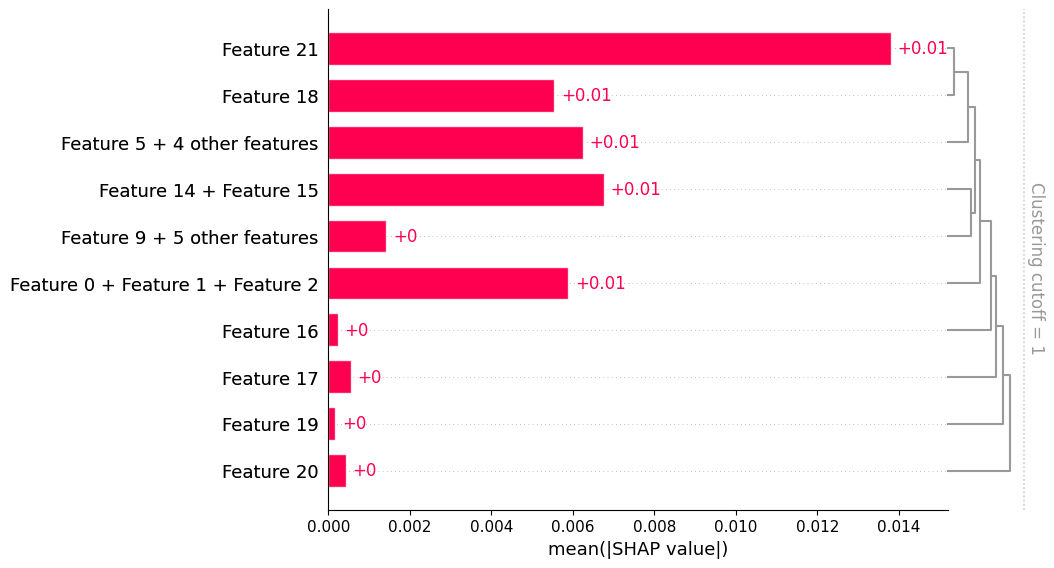

In [27]:
import shap

#runs the explainer on the trained model
explainer = shap.Explainer(model)
shap_values = explainer(X)

#runs clustering
clust = shap.utils.hclust(X, y, linkage="single")

#plots the bar chart of the shap values
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

The data is not labelled correctly in the csv, it has no title to each datatype so it just gives them the names "Feature xxx"